 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whalecsv = Path("./Resources/whale_returns.csv")
whale_df = pd.read_csv(whalecsv, index_col = "Date", infer_datetime_format=True, parse_dates=True)

In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace = True)
whale_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algocsv = Path("./Resources/algo_returns.csv")
algo_df = pd.read_csv(algocsv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500csv = Path("./Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500csv,index_col="Date",infer_datetime_format=True,parse_dates=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].replace({'\$': '', ',': ''}, regex=True).astype(float)
sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [11]:
# Calculate Daily Returns
sp500_df['Close'] = sp500_df['Close'].pct_change()
sp500_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
sp500_df.dropna(inplace=True)
sp500_df.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_columns = ["S&P500 Close"]

sp500_df.columns = sp500_columns
sp500_df.head()

,S&P500 Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_df = pd.concat([sp500_df, algo_df, whale_df], axis="columns", join = "inner")

In [15]:
joined_df.sort_index(inplace=True)
joined_df.head()

,S&P500 Close,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,0.004408,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.001195,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.014378,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.003929,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.017254,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily returns of all portfolios'}, xlabel='Date'>

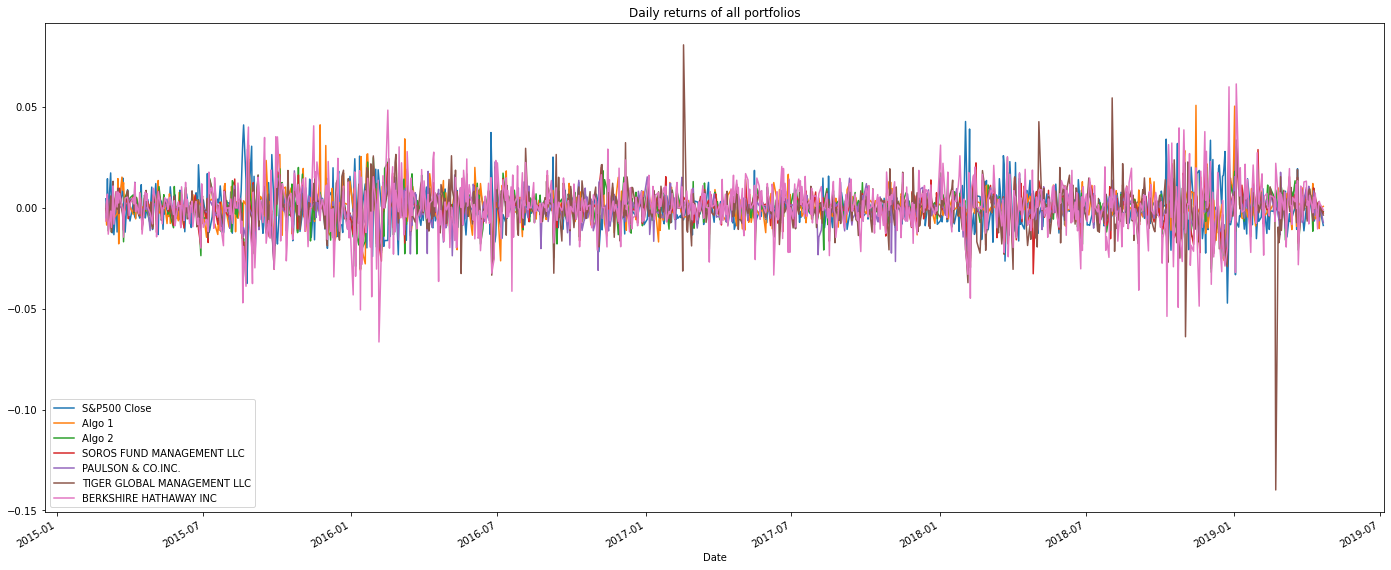

In [16]:
# Plot daily returns of all portfolios
joined_df.plot(figsize=(24,10), title="Daily returns of all portfolios")

#### Calculate and Plot cumulative returns.

In [76]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_df).cumprod()
cumulative_returns.head()

,S&P500 Close,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,1.004408,0.998058,0.999051,0.998734,0.995019,0.999504,0.993431
2015-03-04,1.003208,0.989486,1.001464,1.000962,0.998245,0.996972,0.997617
2015-03-05,1.017632,0.988541,1.005794,1.004981,1.002314,0.999319,1.004327
2015-03-06,1.013634,0.983641,0.994267,0.997037,0.998731,0.990844,0.991172
2015-03-09,1.031123,0.978283,0.995563,0.997617,1.002951,0.996633,0.989534


<AxesSubplot:title={'center':'Cumulative Returns of All Portfolios'}, xlabel='Date'>

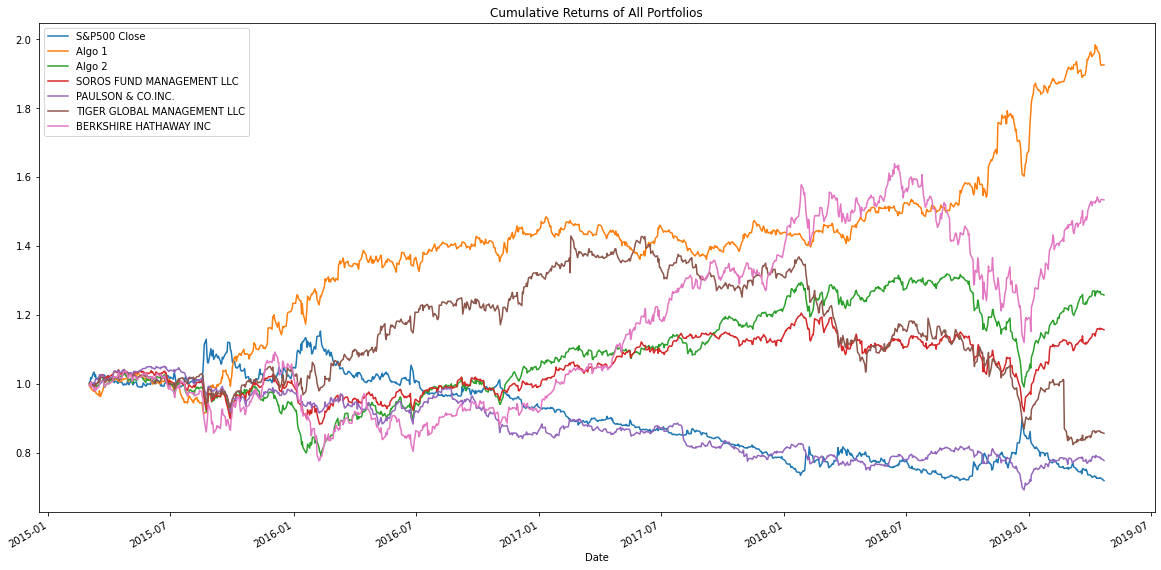

In [18]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10),title="Cumulative Returns of All Portfolios")

## According the the analysis above every portfolio outperformed the S&P 500 by cumulative returns over time. 

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


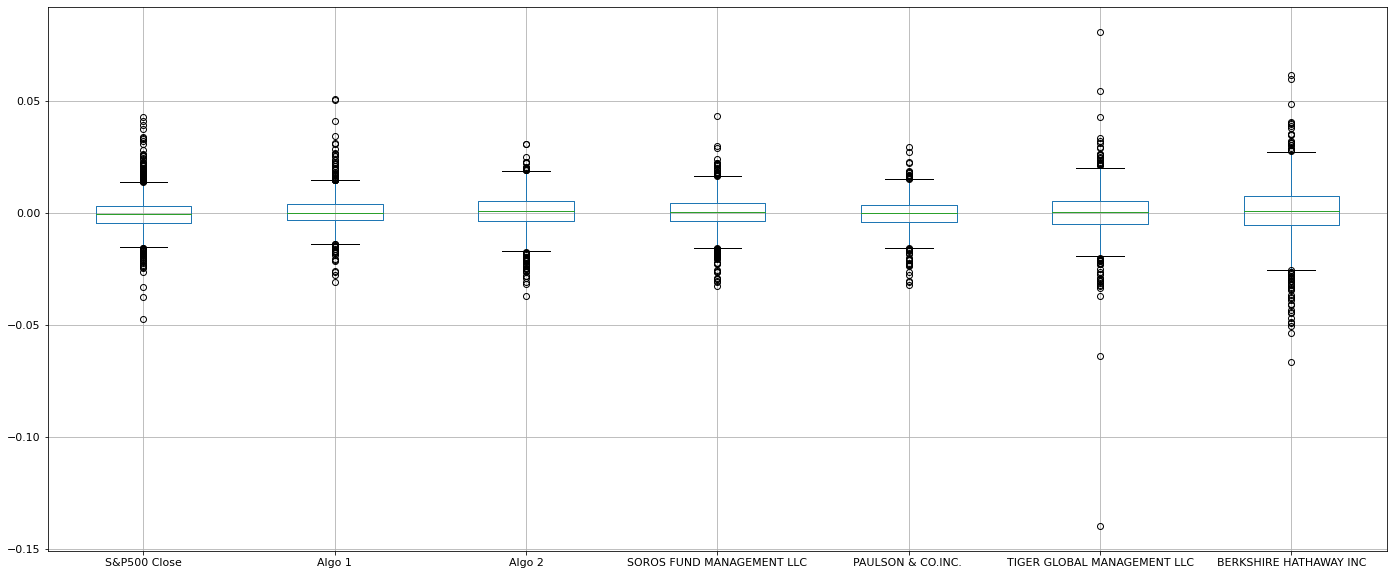

In [75]:
# Box plot to visually show risk
boxplot = joined_df.boxplot(figsize=(24,10),fontsize=11)

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
joined_df.std()

S&P500 Close                   0.008587
Algo 1                         0.007623
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = joined_df['S&P500 Close'].std()
sp500_std

0.00858688974707399

In [23]:
# Determine which portfolios are riskier than the S&P 500
joined_df.std() > sp500_std

S&P500 Close                   False
Algo 1                         False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

## Tiger Global and Berkshire Hathaways' standard deviations are greater than the S&P 500 and thus more risky.

### Calculate the Annualized Standard Deviation

In [25]:
# Calculate the annualized standard deviation (252 trading days)
volatility = joined_df.std() * np.sqrt(252)
volatility

S&P500 Close                   0.136313
Algo 1                         0.121006
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation'}, xlabel='Date'>

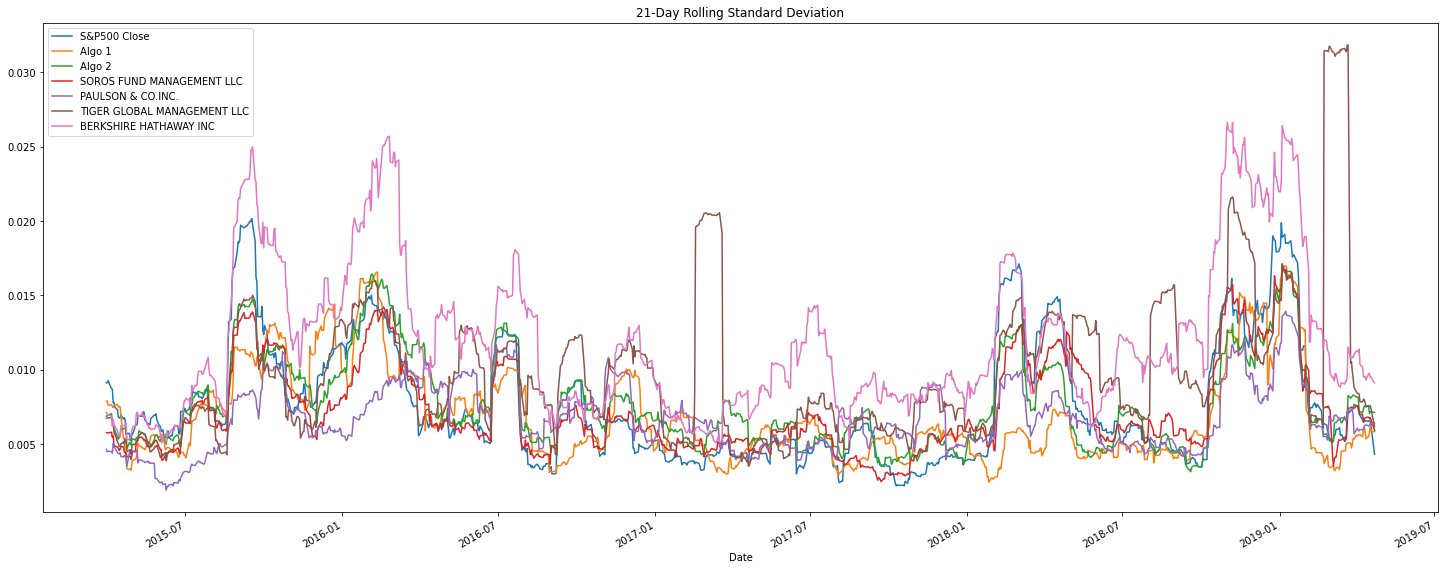

In [72]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_21 = joined_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std_21.plot(figsize=(25,10),title="21-Day Rolling Standard Deviation")

### Calculate and plot the correlation

<AxesSubplot:>

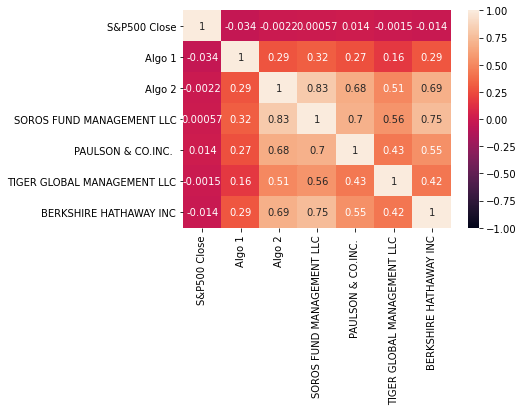

In [27]:
# Calculate the correlation
corr_joined_df = joined_df.corr()
# Display the correlation matrix
sns.heatmap(corr_joined_df,vmin=-1,vmax=1,annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [28]:
# Calculate covariance of a single portfolio
cov_algo_1 = joined_df["Algo 1"].rolling(window=60).cov(joined_df["S&P500 Close"])
cov_algo_1

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15   -0.000005
2019-04-16   -0.000004
2019-04-17   -0.000004
2019-04-18   -0.000004
2019-04-22   -0.000004
Length: 1042, dtype: float64

In [29]:
# Calculate variance of S&P 500
variance = joined_df["S&P500 Close"].rolling(60).var()
variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000041
2019-04-16    0.000037
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
Name: S&P500 Close, Length: 1042, dtype: float64

In [30]:
# Computing beta
beta = cov_algo_1 / variance
beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15   -0.116546
2019-04-16   -0.102774
2019-04-17   -0.101901
2019-04-18   -0.103039
2019-04-22   -0.113498
Length: 1042, dtype: float64

<AxesSubplot:title={'center':'Algorithim 1 Beta'}, xlabel='Date'>

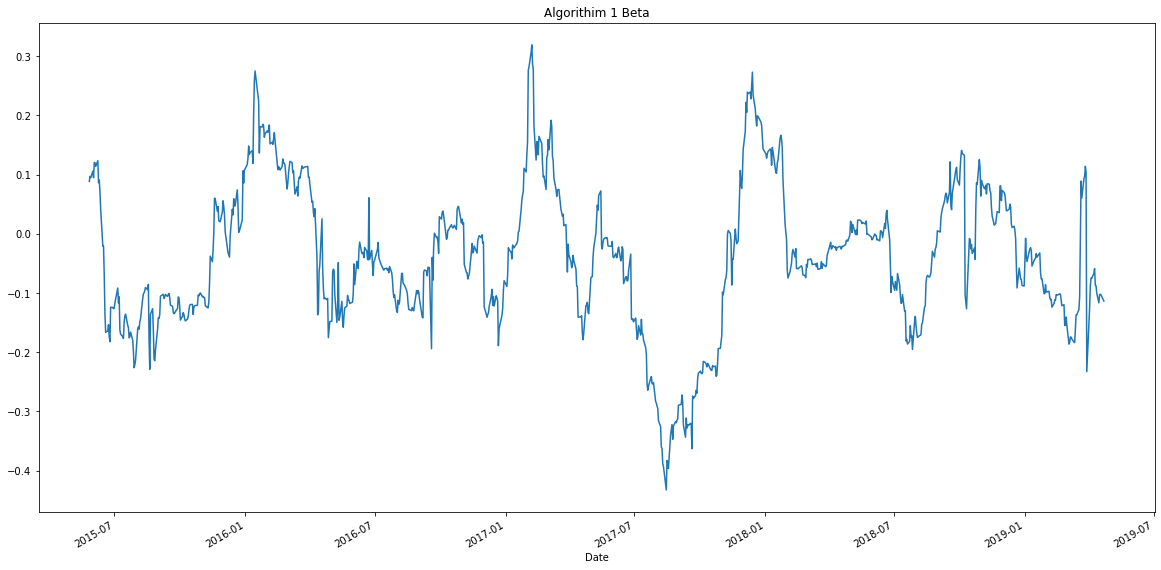

In [31]:
# Plot beta trend
beta.plot(figsize=(20,10), title="Algorithim 1 Beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentially Weighted Avg w/ 21-Day Half-Life'}, xlabel='Date'>

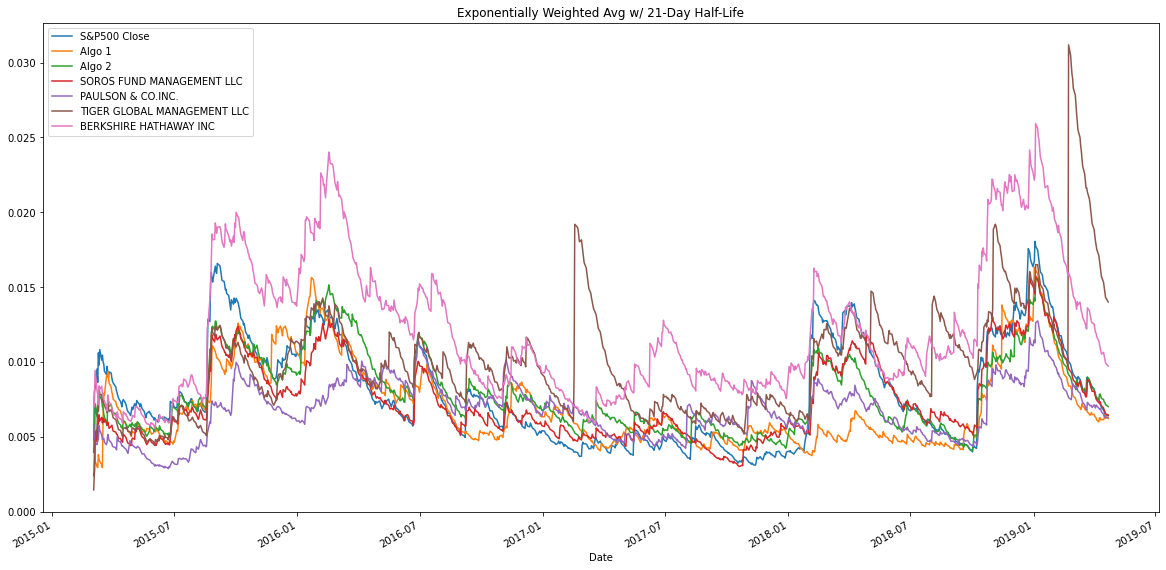

In [77]:
# Use `ewm` to calculate the rolling window # 
joined_df.ewm(21).std().plot(figsize=(20,10),title="Exponentially Weighted Avg w/ 21-Day Half-Life")


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [33]:
# Annualized Sharpe Ratios
sharpe_ratio = ((joined_df.mean() * 252) / (joined_df.std() * np.sqrt(252)))


<AxesSubplot:title={'center':'Sharpe Ratios'}>

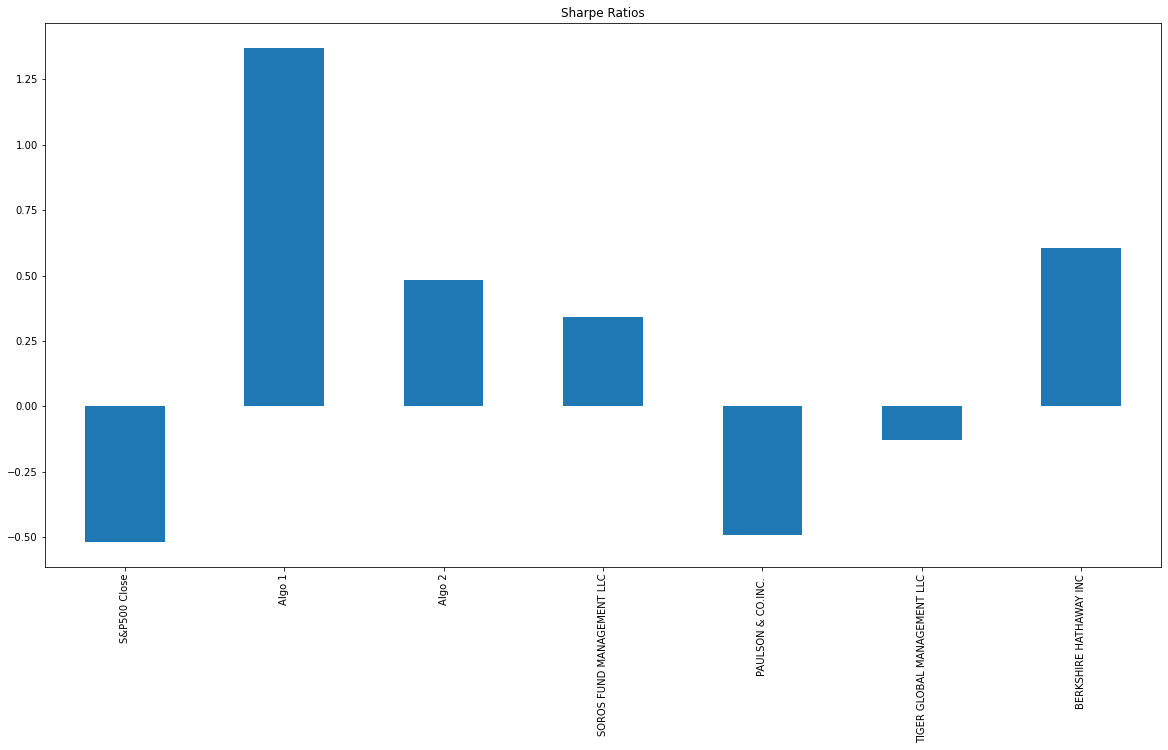

In [34]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar",figsize=(20,10),title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

## From the graph above you can see that the portfolio with the highest Sharpe Ratio is Algorithim 1.  

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [35]:
# Reading data from 1st stock
googcsv = Path("./Resources/goog_historical.csv")
goog_df = pd.read_csv(googcsv, index_col = "Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [36]:
# Drop symbol column and rename close column
goog_df.drop(columns = ["Symbol"],inplace = True)
goog_df.rename(columns = {"NOCP" : "GOOG Close"}, inplace = True)
goog_df.head()

,GOOG Close
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [37]:
# Reading data from 2nd stock
aaplcsv = Path("./Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aaplcsv, index_col = "Trade DATE", infer_datetime_format=True,parse_dates=True)
aapl_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [38]:
# Drop symbol column and rename close column
aapl_df.drop(columns = ["Symbol"], inplace = True)
aapl_df.rename(columns = {"NOCP" : "AAPL Close"}, inplace = True)
aapl_df.head()

,AAPL Close
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [39]:
# Reading data from 3rd stock
costcsv = Path("./Resources/cost_historical.csv")
cost_df = pd.read_csv(costcsv, index_col = "Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [40]:
# Drop symbol column and rename close column
cost_df.drop(columns = ["Symbol"], inplace = True)
cost_df.rename(columns = {"NOCP" : "COST Close"}, inplace = True)
cost_df.head()

,COST Close
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [41]:
# Combine all stocks in a single DataFrame
joined_df_2 = pd.concat([goog_df, aapl_df, cost_df], axis="columns", join = "inner")
joined_df_2.head()

,GOOG Close,AAPL Close,COST Close
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [42]:
# Reset Date index
joined_df_2.reset_index()

,Trade DATE,GOOG Close,AAPL Close,COST Close
0,2019-05-09,1162.38,200.72,243.47
1,2019-05-08,1166.27,202.90,241.34
2,2019-05-07,1174.10,202.86,240.18
3,2019-05-06,1189.39,208.48,244.23
4,2019-05-03,1185.40,211.75,244.62
...,...,...,...,...
245,2018-05-17,1078.59,186.99,199.60
246,2018-05-16,1081.77,188.18,198.71
247,2018-05-15,1079.23,186.44,195.48
248,2018-05-14,1100.20,188.15,195.88


In [43]:
# Reorganize data in ascending order
joined_df_2.sort_index(inplace=True)
joined_df_2.head()

,GOOG Close,AAPL Close,COST Close
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [44]:
# Calculate daily returns
joined_df_2 = joined_df_2.pct_change()


In [45]:
# Drop NAs
joined_df_2.dropna(inplace=True)
joined_df_2.head()

,GOOG Close,AAPL Close,COST Close
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


In [78]:
# Display sample data
combined_df.head()

,S&P500 Close,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,GOOG Close,AAPL Close,COST Close
2018-05-14,0.006889,0.000915,0.001635,0.000000,0.000000,0.000000,0.000000,0.001766,-0.002333,0.000613
2018-05-15,-0.004044,-0.001135,-0.001139,-0.000726,-0.001409,-0.003189,-0.014606,-0.019060,-0.009088,-0.002042
2018-05-16,0.000857,-0.002326,0.003341,0.008637,0.006244,0.005480,0.004310,0.002354,0.009333,0.016523
2018-05-17,0.002639,-0.006949,0.005205,-0.001955,0.002524,-0.006267,-0.005140,-0.002940,-0.006324,0.004479
2018-05-18,-0.007333,0.002557,-0.002496,-0.004357,-0.002672,-0.012832,-0.002212,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [100]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = joined_df_2.dot(weights).to_frame().rename(columns = {0 : "Weighted Portfolio"})
# Display sample data
weighted_returns.head()

,Weighted Portfolio
Trade DATE,
2018-05-14,0.000015
2018-05-15,-0.010064
2018-05-16,0.009403
2018-05-17,-0.001595
2018-05-18,-0.006061


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [125]:
# Join your returns DataFrame to the original returns DataFrame
combined_df = pd.concat([joined_df,weighted_returns],axis="columns", join = "inner")
combined_df.head()

,S&P500 Close,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Weighted Portfolio
2018-05-14,0.006889,0.000915,0.001635,0.000000,0.000000,0.000000,0.000000,0.000015
2018-05-15,-0.004044,-0.001135,-0.001139,-0.000726,-0.001409,-0.003189,-0.014606,-0.010064
2018-05-16,0.000857,-0.002326,0.003341,0.008637,0.006244,0.005480,0.004310,0.009403
2018-05-17,0.002639,-0.006949,0.005205,-0.001955,0.002524,-0.006267,-0.005140,-0.001595
2018-05-18,-0.007333,0.002557,-0.002496,-0.004357,-0.002672,-0.012832,-0.002212,-0.006061


In [126]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df.isnull().sum()

S&P500 Close                   0
Algo 1                         0
Algo 2                         0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Weighted Portfolio             0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [127]:
# Calculate the annualized `std`
combined_df.std()

S&P500 Close                   0.009605
Algo 1                         0.008437
Algo 2                         0.008788
SOROS FUND MANAGEMENT LLC      0.009248
PAULSON & CO.INC.              0.007366
TIGER GLOBAL MANAGEMENT LLC    0.014671
BERKSHIRE HATHAWAY INC         0.015579
Weighted Portfolio             0.013331
dtype: float64

In [128]:
combined_df.head()

,S&P500 Close,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Weighted Portfolio
2018-05-14,0.006889,0.000915,0.001635,0.000000,0.000000,0.000000,0.000000,0.000015
2018-05-15,-0.004044,-0.001135,-0.001139,-0.000726,-0.001409,-0.003189,-0.014606,-0.010064
2018-05-16,0.000857,-0.002326,0.003341,0.008637,0.006244,0.005480,0.004310,0.009403
2018-05-17,0.002639,-0.006949,0.005205,-0.001955,0.002524,-0.006267,-0.005140,-0.001595
2018-05-18,-0.007333,0.002557,-0.002496,-0.004357,-0.002672,-0.012832,-0.002212,-0.006061


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation'}>

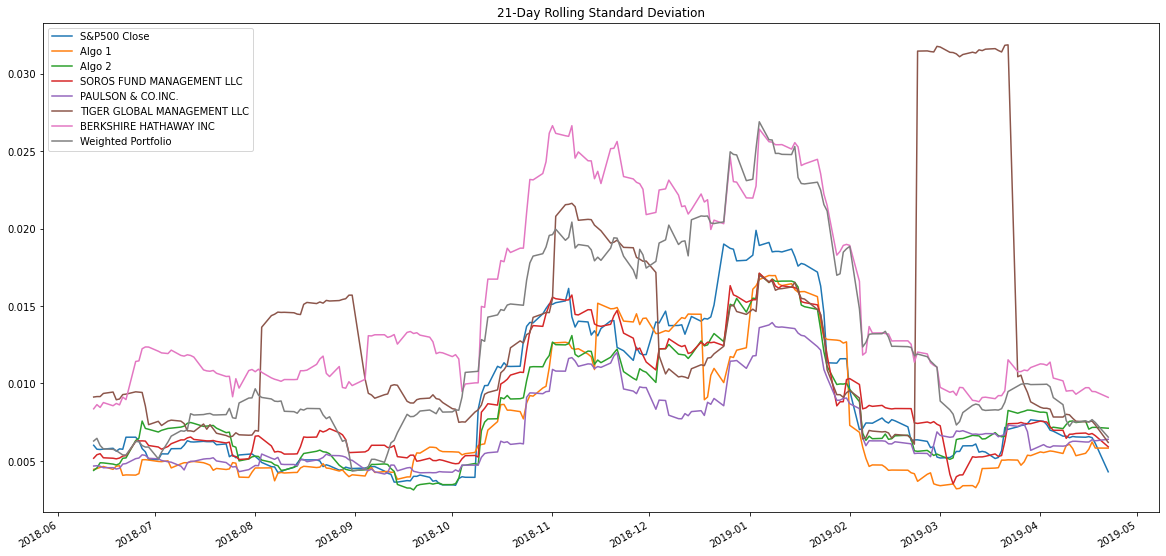

In [129]:
# Calculate rolling standard deviation
combined_df.rolling(21).std()
# Plot rolling standard deviation
combined_df.rolling(21).std().plot(figsize=(20,10),title="21-Day Rolling Standard Deviation")

### Calculate and plot the correlation

<AxesSubplot:>

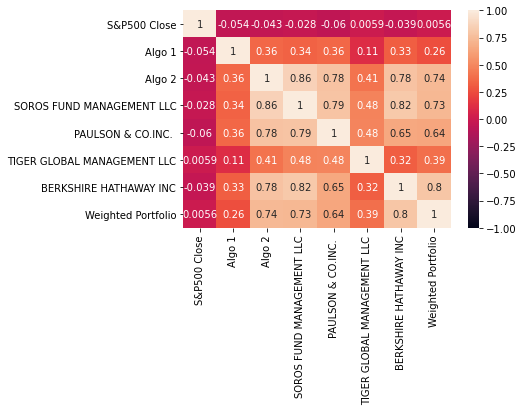

In [130]:
# Calculate and plot the correlation
corr_combined_df = combined_df.corr()
sns.heatmap(corr_combined_df,vmin=-1,vmax=1,annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [131]:
# Calculate and Plot the Beta

cov_1 = combined_df["Weighted Portfolio"].rolling(60).cov(joined_df["S&P500 Close"])

variance_2 = joined_df["S&P500 Close"].rolling(60).var()

beta_2 = cov_1 / variance_2


<AxesSubplot:title={'center':'New Portfolio Beta'}>

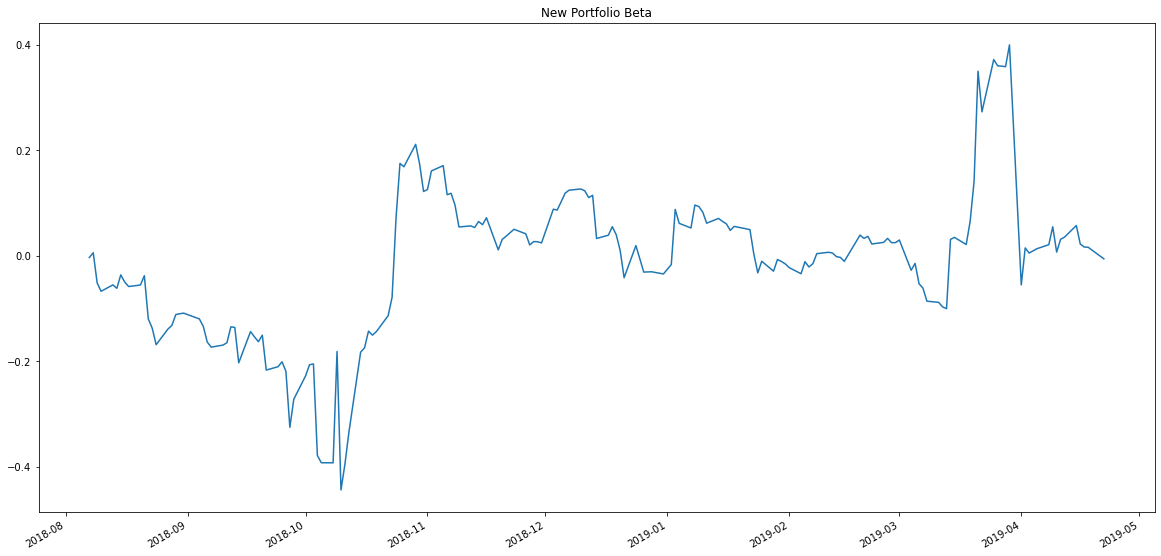

In [132]:
# Plot Beta

beta_2.plot(figsize=(20,10), title="New Portfolio Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [133]:
# Calculate Annualzied Sharpe Ratios
Weighted_Port_Sharpe_Ratio = ((combined_df.mean()*252) / (combined_df.std()* np.sqrt(252)))

<AxesSubplot:title={'center':'Sharpe Ratios of All Portfolios'}>

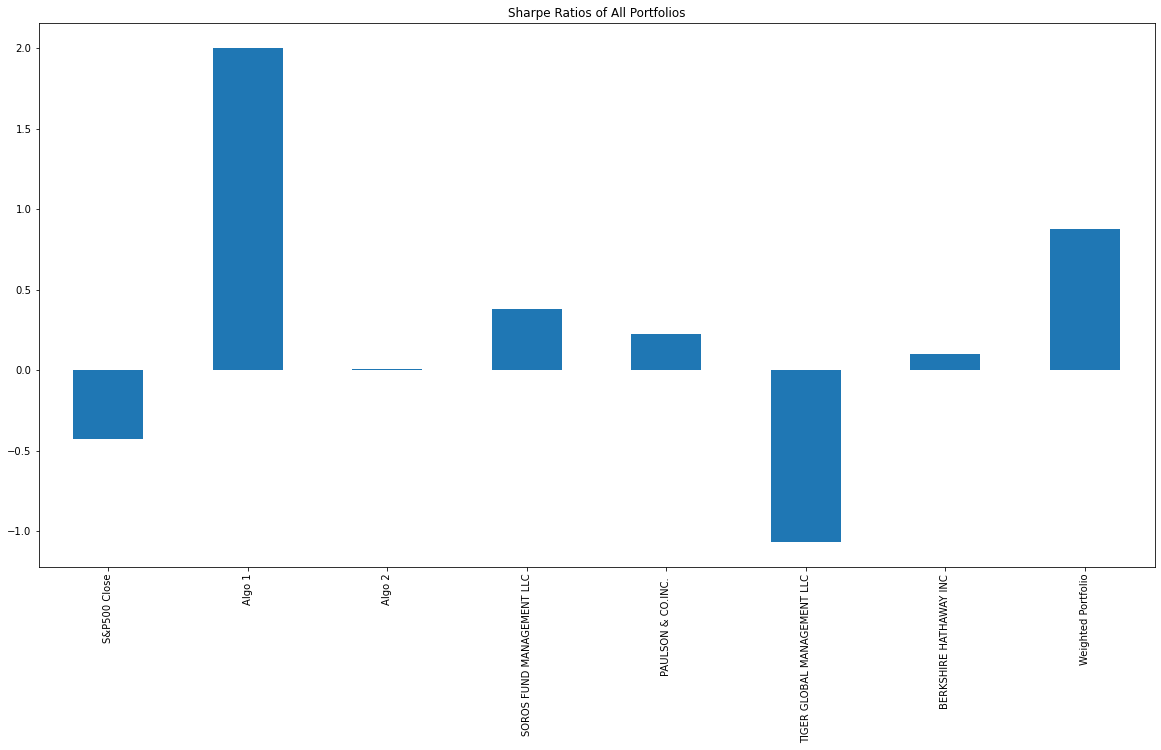

In [134]:
# Visualize the sharpe ratios as a bar plot
Weighted_Port_Sharpe_Ratio.plot(kind="bar",figsize=(20,10),title="Sharpe Ratios of All Portfolios")

### How does your portfolio do?

Write your answer here!

## Looking at the graph above you can see our Weighted Portfolio held its own with its returns and Sharpe Ratio against the other portfolios however Algorithim 1 still surpassed it by a greater margin. 